# <font color="navy"> [6기 1학기 기말고사]

<font color="blue"> 
- **아래의 문제에 답을 채워넣은 뒤 모든 결과물이 프린트 된 상태에서 `File>Download as>HTML(.html)` 형식으로 저장하여 구글폼에 업로드 해주세요.**
- **시험시간은 <font color=red>15:00 부터 16:30 까지<font color=blue> 입니다.**
- **제출 양식은 <font color=red>"6기_기말고사_홍길동" <font color=blue>입니다.**

### [문제 1] 숫자 범위의 시작과 끝을 입력으로 받아 해당 범위에 있는 소수를 반환하는 함수를 만드세요. [30점]

- 소수란 1과 자기 자신으로만 나누어 떨어지는 수를 의미합니다.
- 예) 10과 19를 입력으로 받으면 11,13,17,19를 출력합니다.
        prime(10,19) -> 11, 13, 17, 19

In [159]:
#code here..


### [문제 2] movie 데이터를 불러오고 다음의 문제를 해결하세요. [70점]
**영화( 'movie_title' ) 의 컨텐츠 등급( 'content_rating' )을 예측하는 과정입니다.**

#### [문제 2-1] 결측치 처리 [10점]
- 'actor_2_name', 'actor_2_facebook_likes', 'actor_3_name', 'actor_3_facebook_likes', 'movie_imdb_link', 'plot_keywords' column 을 지우세요.
- 각 column의 결측치를 확인하고 'color'와 'gross' 열에 결측치가 있다면 해당 행을 제거하세요.
- 'budget'의 결측치는 평균값으로, 'content_rating' 는 최빈값으로 대체하세요. 이때 최빈값은 시각화하여 확인한 후 대체하세요.

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
import pandas as pd
data = pd.read_csv('./movie.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [211]:
data.drop(['actor_2_name','actor_2_facebook_likes','actor_3_name','actor_3_facebook_likes','movie_imdb_link','plot_keywords'], axis=1, inplace=True)

In [212]:
a=data[(data['color'].isnull()==True)&(data['gross'].isnull()==True)].index
data.drop(a, axis=0, inplace=True)

In [213]:
mean=data['budget'].mean()
data['budget'].fillna(mean)
most_freq=data['content_rating'].value_counts(dropna=True).idxmax()
data['content_rating'].fillna(most_freq, inplace=True)

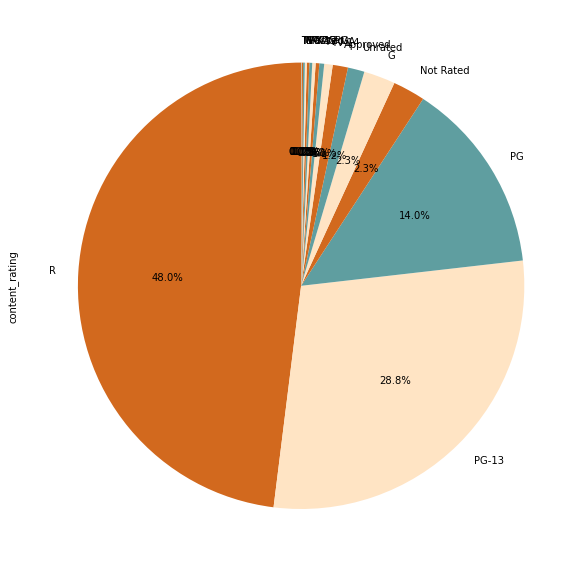

In [214]:
data['content_rating'].value_counts().plot(kind='pie', figsize=(10,12), autopct='%1.1f%%', startangle=90, colors=['chocolate','bisque','cadetblue'])

#### [문제 2-2] 시각화 및 feature 생성 [20점]
- 'content_rating' 이 `'R'`, `'PG-13'`, `'PG'` 인 데이터만 추출하여 data2 변수에 저장하고, 다음과 같은 결과가 나오도록 시각화 하세요.
![nn](boxplot.png)

In [215]:
data2=data[(data['content_rating']=='R')|(data['content_rating']=='PG-13')|(data['content_rating']=='PG')]

In [216]:
features = pd.DataFrame(data2[['movie_title','director_name']])
features['director_name'].dropna(inplace=True)

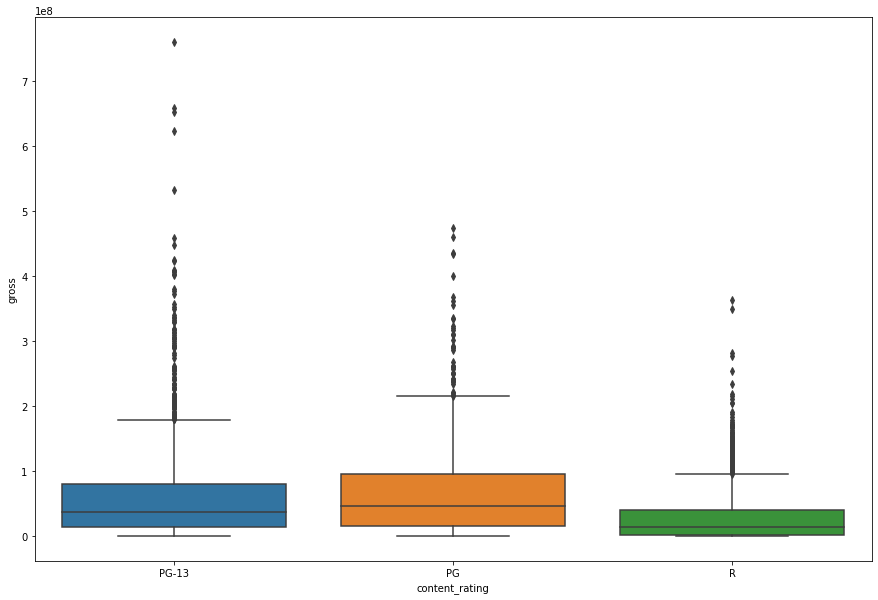

In [217]:
fig=plt.figure(figsize=(15,10))
sns.boxplot(x='content_rating', y='gross', data=data2)

- 정수형 데이터인 'aspect_ratio' 를 범주형 데이터 `'norrow'`, `'standard'`, `'wide'` 로 다시 나누어 'aspect_ratio2' 열을 만드세요. 단, 나눈 기준에 대한 근거로 시각화 자료를 제시하세요.
- 'aspect_ratio2' 열을 더미변수로 바꾼 후 features에 concat으로 연결하세요. **(연결 후 features의 column 개수는 5개 입니다 !!)**

In [218]:
import numpy as np

In [219]:
data['aspect_ratio']
data['aspect_ratio'].fillna(0, inplace=True)
counts, bin_dividers=np.histogram(data['aspect_ratio'], bins=3)
bin_names=['narrow','standard','wide']
data['aspect_ratio2']=pd.cut(x=data['aspect_ratio'], bins=bin_dividers, labels=bin_names, include_lowest=True)

In [220]:
ratio=pd.get_dummies(data['aspect_ratio2'])
features=pd.concat([features, ratio], axis=1, join='outer')

- 영화감독별 `'gross'`, `'duration'`, `'budget'`, `'imdb_score'`의 평균을 구한 feature를 features 에 추가하세요.

In [221]:
ndata2=data2.groupby('director_name', as_index=False).mean()
data2=ndata2.loc[:,['director_name','gross','duration','budget','imdb_score'] ]

In [222]:
merged=pd.merge(data2, features, on='director_name')

In [223]:
merged

,director_name,gross,duration,budget,imdb_score,movie_title,narrow,standard,wide
0,A. Raven Cruz,NaN,97.0,1000000.0,1.9,The Helix... Loaded,1,0,0
1,Aaron Schneider,9176553.0,100.0,7500000.0,7.1,Get Low,1,0,0
2,Aaron Seltzer,48546578.0,85.0,20000000.0,2.7,Date Movie,1,0,0
3,Abel Ferrara,1227324.0,99.0,12500000.0,6.6,The Funeral,1,0,0
4,Adam Brooks,31973840.0,112.0,NaN,7.2,"Definitely, Maybe",1,0,0
...,...,...,...,...,...,...,...,...,...
4406,Zal Batmanglij,1336955.0,100.5,6500000.0,6.8,Sound of My Voice,1,0,0
4407,Zoran Lisinac,NaN,108.0,250000.0,7.1,Along the Roadside,1,0,0
4408,Álex de la Iglesia,3607.0,104.0,10000000.0,6.1,The Oxford Murders,1,0,0
4409,Émile Gaudreault,6239558.0,92.0,5000000.0,6.7,Mambo Italiano,1,0,0


In [201]:
gross_mean=merged['gross'].mean()
duration_mean=merged['duration'].mean()
imdb_score_mean=merged['imdb_score'].mean()
budget_mean=merged['budget'].mean()

merged['gross'].fillna(gross_mean, inplace=True)
merged['duration'].fillna(duration_mean, inplace=True)
merged['imdb_score'].fillna(imdb_score_mean, inplace=True)
merged['budget'].fillna(budget_mean, inplace=True)

In [202]:
merged

,director_name,gross,duration,budget,imdb_score,movie_title,narrow,standard,wide
0,A. Raven Cruz,4.749014e+07,97.0,1.000000e+06,1.9,The Helix... Loaded,1,0,0
1,Aaron Schneider,9.176553e+06,100.0,7.500000e+06,7.1,Get Low,1,0,0
2,Aaron Seltzer,4.854658e+07,85.0,2.000000e+07,2.7,Date Movie,1,0,0
3,Abel Ferrara,1.227324e+06,99.0,1.250000e+07,6.6,The Funeral,1,0,0
4,Adam Brooks,3.197384e+07,112.0,3.778414e+07,7.2,"Definitely, Maybe",1,0,0
...,...,...,...,...,...,...,...,...,...
4406,Zal Batmanglij,1.336955e+06,100.5,6.500000e+06,6.8,Sound of My Voice,1,0,0
4407,Zoran Lisinac,4.749014e+07,108.0,2.500000e+05,7.1,Along the Roadside,1,0,0
4408,Álex de la Iglesia,3.607000e+03,104.0,1.000000e+07,6.1,The Oxford Murders,1,0,0
4409,Émile Gaudreault,6.239558e+06,92.0,5.000000e+06,6.7,Mambo Italiano,1,0,0


In [224]:
merged.set_index('director_name')

,gross,duration,budget,imdb_score,movie_title,narrow,standard,wide
director_name,,,,,,,,
A. Raven Cruz,NaN,97.0,1000000.0,1.9,The Helix... Loaded,1,0,0
Aaron Schneider,9176553.0,100.0,7500000.0,7.1,Get Low,1,0,0
Aaron Seltzer,48546578.0,85.0,20000000.0,2.7,Date Movie,1,0,0
Abel Ferrara,1227324.0,99.0,12500000.0,6.6,The Funeral,1,0,0
Adam Brooks,31973840.0,112.0,NaN,7.2,"Definitely, Maybe",1,0,0
...,...,...,...,...,...,...,...,...
Zal Batmanglij,1336955.0,100.5,6500000.0,6.8,Sound of My Voice,1,0,0
Zoran Lisinac,NaN,108.0,250000.0,7.1,Along the Roadside,1,0,0
Álex de la Iglesia,3607.0,104.0,10000000.0,6.1,The Oxford Murders,1,0,0


- feature들의 피어슨 상관계수를 다음과 동일하게 도식화 하세요. figsize는 (8,7) 입니다.
![nn](heatmap.png)

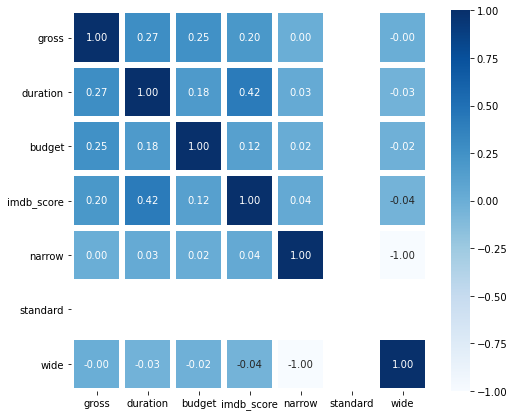

In [225]:
plt.figure(figsize=(8,7))
sns.heatmap(data=correlation, annot=True, fmt='.2f',linewidths=5, cmap='Blues')
plt.show()

#### [문제 2-3] 데이터 표준화 [5점]
- 'content_rating'열을 data2에 추가해주세요.
- X에 `'norrow'`, `'standard'`, `'wide'`, `'duration_mean'`,`'gross_mean'`,`'budget_mean'`,`'imdb_score_mean'`열만 저장해주세요.
- Y에 `'content_rating'`열을 저장해주세요.
- StandardScaler를 이용해 X를 표준화한 다음 decribe()함수로 확인해주세요.

In [226]:
a=data[(data['content_rating'].isnull()==True)].index
data.drop(a, axis=0, inplace=True)

In [227]:
merged['content_rating']=data['content_rating']

In [228]:
merged.drop(['movie_title'], axis=1, inplace=True)

In [229]:
merged.set_index('director_name', inplace=True)

In [230]:
X=merged.iloc[:, :-1]
y=merged.iloc[:, -1]

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

#### [문제 2-4] 데이터 학습 및 평가 [15점]
- X, Y를 훈련 데이터와 평가 데이터로 7:3의 비율로 나눠주세요. random_state는 10으로 고정해주세요.
- RandomForest와 SVM, DecisionTree를 학습한 다음 정확도`('accuracy')`를 계산해주세요.

        - 답안예시 -
        test set RandomForestClassifier 분류기 정확도 : 0.5836
        test set SVC 분류기 정확도 : 0.5261
        test set DecisionTreeClassifier 분류기 정확도 : 0.5253
-------------------------------------------------------------
**- Hint -**
1. for 문을 사용하면 빠르고 쉽지만 어려우시다면 각각 모델 돌리셔도 됩니다.
2. 출력문은 print("test set {} 분류기 정확도 : {:.4f}".format(A, B)) 형식을 사용하면 됩니다.

In [231]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split 

In [232]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.3, random_state=10)

In [234]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [235]:
rf_clf=RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0)
rf_clf.fit(X_train, y_train)
pred=rf_clf.predict(X_test)
print("test set {0:.4f} 분류기 정확도 : {1:.4f}".format(accuracy_score(y_test, pred)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

#### [문제 2-5] 데이터 학습 및 평가 (앙상블-보팅) [10점]
- RandomForest와 SVM, DecisionTree를 활용한 앙상블(보팅)모델을 구현해주세요.
- 디폴트 값인 하드보팅으로 해주시면 됩니다.

        - 답안예시 -
        Voting 분류기 정확도: 0.5714

In [181]:
#code here..


#### [문제 2-6] 데이터 학습 및 평가(교차검증) [10점]
- **문제[2-5]** 의 앙상블 모델을 교차검증을 통해 정확도를 다시 계산하는 과정입니다.
- stratified k-fold cross-validation을 사용해주세요. 5겹으로 데이터를 나누고, fold를 나누기 전 무작위로 섞도록 설정해주세요.
- 교차 검증별 정확도와 평균 검증 정확도를 계산해주세요.

        - 답안예시 -
        교차 검증별 정확도: [0.5888 0.5843 0.5673 0.5621 0.5569]
        평균 검증 정확도: 0.5719

In [182]:
#code here..
